## In dit script verkrijgen we de data
<br />
We verkrijgen de data via de package pandas_datareader.
**Installeer de package als dat nog niet gedaan is.**
<break>
**Hoe installeer je pandas_datareader?:**
- ga naar anaconda prompt
- tik in "pip install pandas-datareader"
- druk op enter
- je kan de package nu in je script gebruiken



In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In de cel hieronder verkrijgen wij de stockprijzen van ING en S&P500.
<br />
Hierin worden alle stockprijzen verkregen tussen 1 januari 2010 en 31 dec 2019
<break>
Enkele opmerkingen over de functie:
- format voor datum is Y-M-D
- vTickers is een list met de tickers van ING en S&P500
- de functie returnt een dataframe met alle stockprijzen (de close price) 

In [2]:
def getdata():
    sStartDate='2010-1-1'
    sEndDate= '2019-12-31'
    vTickers=['^FCHI','^AEX']
    mPrice=pd.DataFrame()
    for t in vTickers:
        mPrice[t]=wb.DataReader(t, data_source='yahoo', start=sStartDate, end=sEndDate)['Close']
    return mPrice     
        
    

In [3]:
getdata().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2554 entries, 2010-01-04 to 2019-12-31
Data columns (total 2 columns):
^FCHI    2554 non-null float64
^AEX     2554 non-null float64
dtypes: float64(2)
memory usage: 59.9 KB


In de cel hieronder worden de returns van de stockrpijzen verkregen
<br \>
We willen graag de log-returns van de stockprijzen berekenen. Dit gaat we doen door de functie .pct_change() toe te passen
<break>
pct_change berekent de simple returns oftwel:
$$
 \frac{ P_{t}-P_{t-1}}{P_{t-1} }
$$
We willen graag log returns bereken en die formule ziet er als volgt uit:
$$
 \ln\left( \frac{P_t}{P_{t-1}} \right)
$$
We kunnen de log returns omschrijven in termen van simple returns:
$$
\ln\left(\frac{P_t}{P_{t-1}} \right) = \ln\left( \frac{P_t - P_{t-1}}{P_{t-1}} + \frac{P_{t-1}}{P_{t-1}}\right) = \ln\left(\ simple.returns + 1\right)
.$$

In [4]:
def getreturns():
    mPrice=getdata()
    vColumnNames=mPrice.columns
    for i in vColumnNames:
        mPrice["ret-"+i]=np.log(mPrice[i].pct_change() + 1)*100
    mReturn=mPrice.iloc[:,2:]
    mReturn.dropna(inplace=True)
    mReturn.rename(columns={"ret-^FCHI": "FR", "ret-^AEX": "NL"},inplace=True)
    return mReturn

In [5]:
df=getreturns()

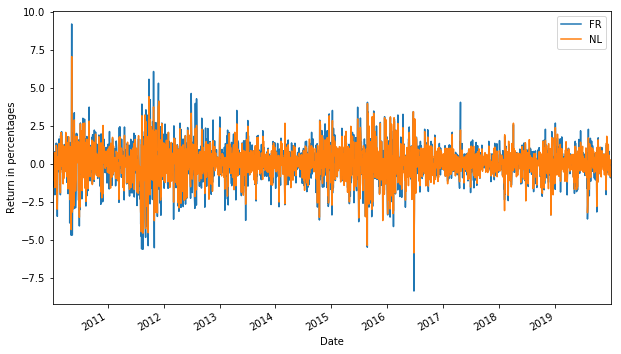

In [6]:
df.plot(figsize=(10,6))
plt.ylabel("Return in percentages")
plt.show()

In [12]:
df.loc[:"2015"].pow(2).corr()

,FR,NL
FR,1.00000,0.92693
NL,0.92693,1.00000


         FR       NL
FR  1.00000  0.92693
NL  0.92693  1.00000


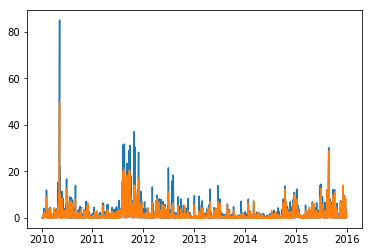

In [10]:
mInSampleReturns = df.loc[:"2015"]
variance=mInSampleReturns.pow(2)
print(variance.corr())
plt.plot(variance)
plt.show()